In [1]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 15.2MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
path = "drive/MyDrive/Mask/Lense/"

In [8]:
x = []
y = []
size = (160,160)

In [9]:
for i in range(7):
  img = cv2.imread(path + "Lense/lense.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("lense")
  img = cv2.imread(path + "No lense/no_lense.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("no lense")

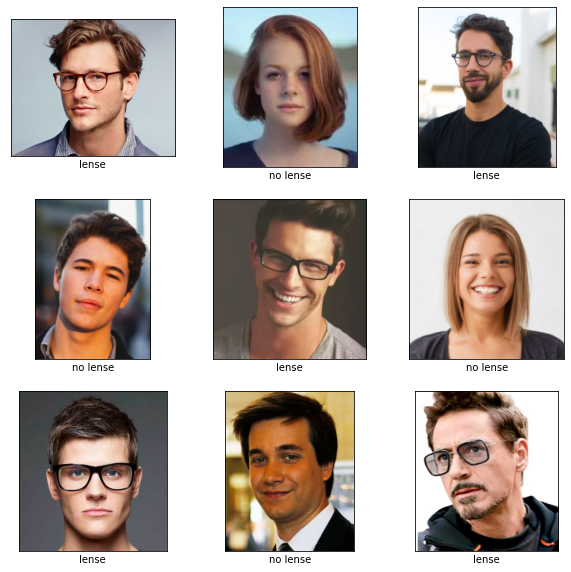

In [10]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(x[i])
    ax.set_xlabel(y[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [11]:
print(len(x))
print(len(y))

14
14


In [12]:
x1 = []
detector = MTCNN()

In [13]:
temp = 0
for i in x:
    img = i
    result = detector.detect_faces(img)
    if(result == []):
        temp +=1
        print(temp)
        continue
    X1, Y1 = result[0]["box"][0] , result[0]["box"][1]
    X2, Y2 = abs(X1) + abs(result[0]["box"][2]), abs(Y1) + abs(result[0]["box"][3])
    img = img[Y1:Y2, X1:X2]
    x1.append(img)

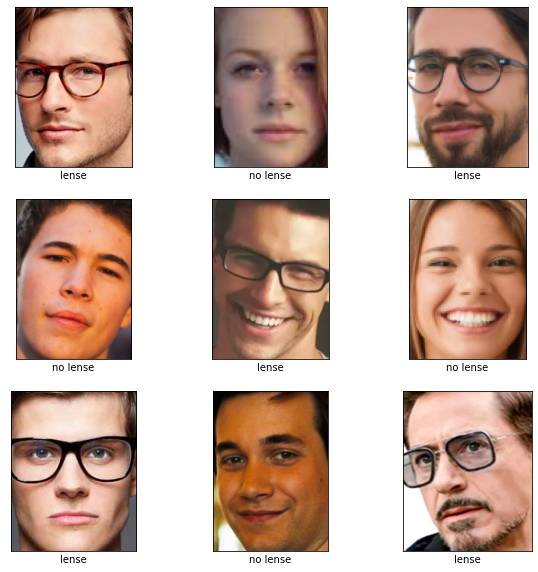

In [14]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(x1[i])
    ax.set_xlabel(y[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [25]:
x2 = []
temp = 0
for i in x:
    img = i
    result = detector.detect_faces(img)
    if(result == []):
        temp +=1
        print(temp)
        continue
    X1, Y1 = result[0]["box"][0] , result[0]["box"][1]
    X2, Y2 = abs(X1) + abs(result[0]["box"][2]), abs(Y1) + abs(result[0]["box"][3])
    Y3 = (Y1 + Y2)//2
    img = img[(Y1 + int(0.6*Y1)):Y3 + int(0.1*Y1), X1:X2]
    img = cv2.resize(img, size)
    x2.append(img)

In [26]:
fig = plt.figure(figsize=(10, 10), dpi=1000)
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.imshow(x2[i])
    ax.set_xlabel(y[i])
    ax.set_xticks([])
    ax.set_yticks([])
#plt.savefig("Desktop/Mask/Generated Files/mask/plots/transform_2.png")

In [27]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [28]:
encoder = LabelEncoder()

In [29]:
y_ = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(y_, len(np.unique(y_)))

In [30]:
y_onehot[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x2,y_onehot, stratify = y)

In [32]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [56]:
vgg16 =  VGG16(input_shape=(160,160,3), weights='imagenet', include_top=False)

In [57]:
for layer in vgg16.layers:
    layer.trainable = False

In [58]:
x = Flatten()(vgg16.output)
prediction = Dense(2, activation='softmax')(x)

In [59]:
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)     

In [60]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [61]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 230ms/step - loss: 5.9660 - accuracy: 0.7000 - val_loss: 21.8543 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 47ms/step - loss: 8.4806 - accuracy: 0.6000 - val_loss: 8.1666 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 41ms/step - loss: 1.0657e-05 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.3644e-07 - val_accuracy: 1.0000


In [62]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


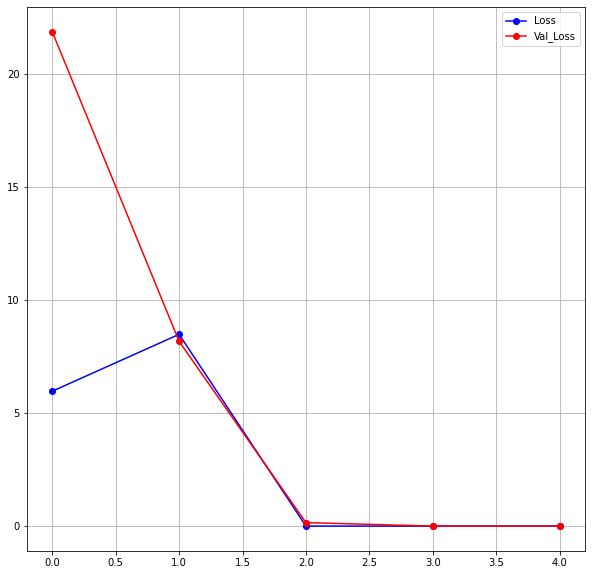

In [63]:
plt.figure(figsize=(10,10))
plt.plot(list(range(0,5)),history.history["loss"], marker = "o", label = "Loss", color = "blue")
plt.plot(list(range(0,5)),history.history["val_loss"], marker = "o", label = "Val_Loss", color = "red")
plt.grid(True)
plt.legend()

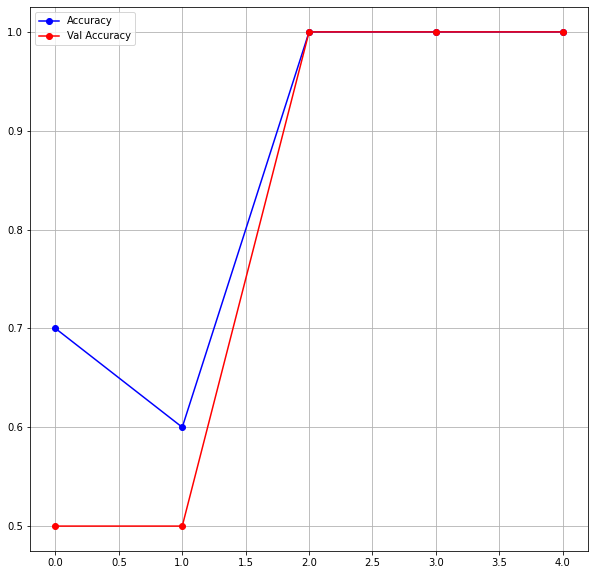

In [64]:
plt.figure(figsize=(10,10))
plt.plot(list(range(0,5)),history.history["accuracy"], marker = "o", color = "blue", label = "Accuracy")
plt.plot(list(range(0,5)),history.history["val_accuracy"], marker = "o", color = "red", label = "Val Accuracy")
plt.grid(True)
plt.legend()

In [46]:
import pickle

In [65]:
model.save("drive/MyDrive/Mask/Lense Model.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/MyDrive/Mask/Lense Model.model/assets


In [66]:
from keras.models import load_model

In [68]:
mo = load_model("drive/MyDrive/Mask/Lense Model.model")

In [69]:
result = mo.predict(x_test)

In [72]:
for i in result:
  print(encoder.inverse_transform([np.argmax(i)]))

['lense']
['lense']
['no lense']
['no lense']


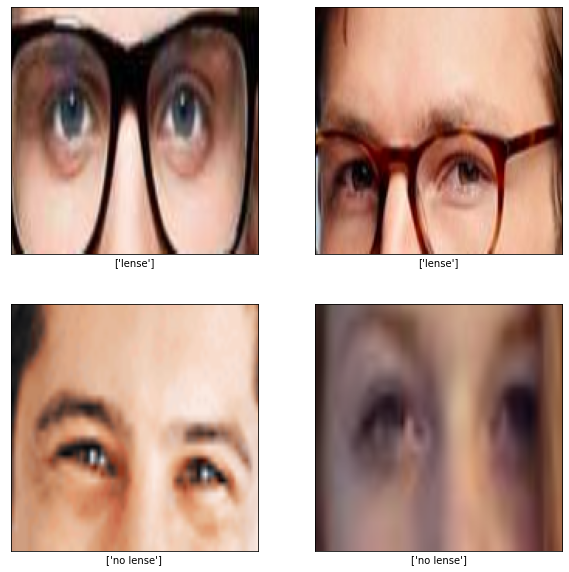

In [74]:
fig = plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.imshow(x_test[i])
    ax.set_xlabel(encoder.inverse_transform([np.argmax(result[i])]))
    ax.set_xticks([])
    ax.set_yticks([])